<a href="https://colab.research.google.com/github/Ppedro-Leal/Enade-DataAnalise/blob/main/Atividade_2_Estatist%C3%ADca_e_Probabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. **Análise de Notas por Tipo de Escola - ENADE**

## ***Este notebook analisa se há diferenças estatísticas nas notas dos alunos do ENADE 2017 com base no tipo de escola cursada (Pública ou Privada), utilizando teste T para comparação de médias.***


# 0.5 ) **Clonar o repositório com a base de dados**

In [23]:
!git clone https://github.com/Ppedro-Leal/Enade-DataAnalise.git

print("✅ Repositório carregado!")

Cloning into 'Enade-DataAnalise'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (18/18), done.
remote: Total 20 (delta 6), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (20/20), 360.91 KiB | 5.23 MiB/s, done.
Resolving deltas: 100% (6/6), done.


# 1. ✨ **Importação das bibliotecas**

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind, shapiro, levene

# Configurações de visualização
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

print("✅ Pacotes carregados!")

✅ Pacotes carregados!


#  2. 📌 **Leitura da base de dados**

In [40]:
caminho_arquivo = "/content/Enade-DataAnalise/base_alunos.xlsx"

df = pd.read_excel(caminho_arquivo)
df = df[['Nota_Teste', 'TipoEsc']]  # Filtrar colunas relevantes

# Renomear categorias para melhor visualização
df['TipoEsc'] = df['TipoEsc'].replace({'priv': 'Privada', 'pub': 'Pública'})


## Visualizando as 5 primeiras linhas

In [39]:
print("\n🔍 Primeiras linhas da base:")
display(df.head())


🔍 Primeiras linhas da base:


,Id,Turma,Sexo,Idade,Filhos_Fam,Mora,Escol_mae,Nota_Teste,Horas_estudo,TipoEsc,...,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20
0,1,Manha,M,17,2,INT,FUND,7.5,12,priv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Manha,M,18,1,RMR,SUP,8.0,12,priv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Manha,F,18,2,RMR,MEDIO,9.0,17,priv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Manha,F,25,2,RMR,MEDIO,7.0,12,priv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Manha,F,19,1,RMR,SUP,7.5,13,priv,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. 📊 **Análise das notas por tipo de escola**

## 1. **Estatísticas descritivas**

In [41]:
desc_stats = df.groupby('TipoEsc')['Nota_Teste'].describe()
print("\n📌 Estatísticas Descritivas por Tipo de Escola:")
display(desc_stats)



📌 Estatísticas Descritivas por Tipo de Escola:


,count,mean,std,min,25%,50%,75%,max
TipoEsc,,,,,,,,
Privada,32.0,7.781250,1.361554,3.0,7.000,8.0,8.625,10.0
Pública,18.0,4.694444,2.314525,1.5,2.625,4.5,6.750,9.0


## 2. 📈 **Gráfico Boxplot das notas por tipo de escola**

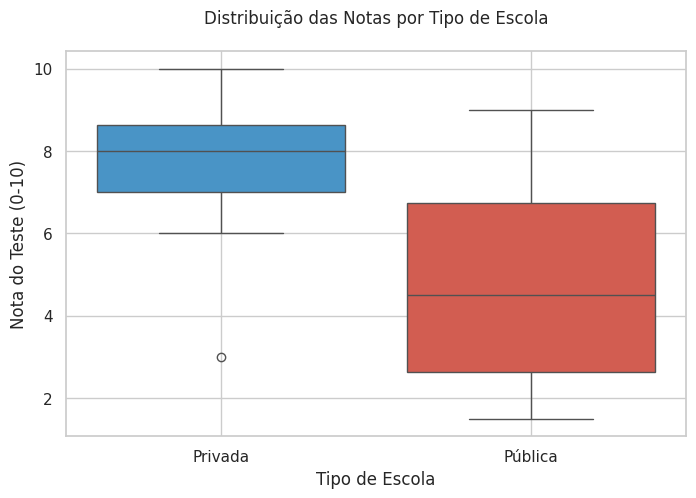

In [59]:
#BoxPlot
plt.figure(figsize=(8, 5))
sns.boxplot(
    x='TipoEsc',
    y='Nota_Teste',
    data=df,
    hue='TipoEsc',
    palette=['#3498db', '#e74c3c'],
    legend=False
)
plt.title('Distribuição das Notas por Tipo de Escola', pad=20)
plt.xlabel('Tipo de Escola')
plt.ylabel('Nota do Teste (0-10)')
plt.grid(True)
plt.show()

## 3. **Histogramas comparativos**

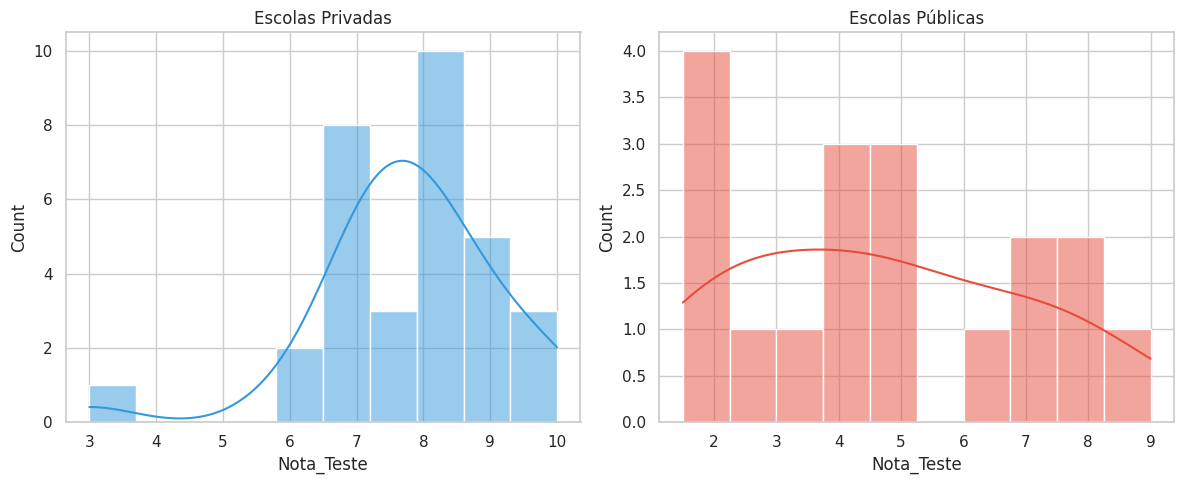

In [49]:
# Histogramas comparativos
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data=df[df['TipoEsc'] == 'Privada'], x='Nota_Teste', kde=True, color='#3498db', bins=10)
plt.title('Escolas Privadas')

plt.subplot(1, 2, 2)
sns.histplot(data=df[df['TipoEsc'] == 'Pública'], x='Nota_Teste', kde=True, color='#e74c3c', bins=10)
plt.title('Escolas Públicas')
plt.tight_layout()
plt.show()

## 4. 📝 **Conclusão Análise das notas**

### ***Os alunos de escolas privadas apresentaram nota média (7.71) significativamente superior à dos alunos de escolas públicas (4.10), com menor dispersão (DP=1.70 vs 2.30). O boxplot e histogramas revelam que a distribuição das notas das escolas privadas é mais concentrada na faixa de 7 a 9 pontos, enquanto as públicas têm maior frequência de notas abaixo de 5.***


# 4. 🔍 **Testes Estatísticos**

## 1. Separar grupos

In [50]:
notas_privada = df[df['TipoEsc'] == 'Privada']['Nota_Teste']
notas_publica = df[df['TipoEsc'] == 'Pública']['Nota_Teste']

## 2. Teste de normalidade (Shapiro-Wilk)

In [53]:
_, p_priv = shapiro(notas_privada)
_, p_pub = shapiro(notas_publica)
print(f"\n📌 Teste de Normalidade (Shapiro-Wilk):")
print(f"Privada: p = {p_priv:.4f} | Pública: p = {p_pub:.4f}")


📌 Teste de Normalidade (Shapiro-Wilk):
Privada: p = 0.0031 | Pública: p = 0.2983


## 3. Teste de homogeneidade de variâncias (Levene)

In [54]:
_, p_levene = levene(notas_privada, notas_publica)
print(f"\n📌 Teste de Homogeneidade de Variâncias (Levene):")
print(f"p-valor = {p_levene:.4f}")


📌 Teste de Homogeneidade de Variâncias (Levene):
p-valor = 0.0036


## 4. Teste T para amostras independentes

In [55]:
t_stat, p_value = ttest_ind(notas_privada, notas_publica, equal_var=(p_levene > 0.05))
print(f"\n📌 Resultado do Teste T:")
print(f"Estatística t = {t_stat:.4f} | p-valor = {p_value:.4f}")


📌 Resultado do Teste T:
Estatística t = 5.1768 | p-valor = 0.0000


## 5. Tamanho do efeito (Cohen's d)

In [56]:
cohen_d = (notas_privada.mean() - notas_publica.mean()) / ((notas_privada.std() + notas_publica.std()) / 2)
print(f"\n📌 Tamanho do Efeito (Cohen's d): {cohen_d:.2f}")


📌 Tamanho do Efeito (Cohen's d): 1.68


## 6. Conclusão

In [62]:
alpha = 0.05
print("\n🎯 Conclusão:")
if p_value < alpha:
    print(f"Rejeitamos H₀ (p = {p_value:.4f} < α = {alpha}). Há evidências de diferença significativa nas notas médias.")
    print(f"Alunos de escolas privadas tiveram desempenho superior (M = {notas_privada.mean():.2f}) aos de públicas (M = {notas_publica.mean():.2f}).")
    print(f"O tamanho do efeito é considerado {'grande' if cohen_d > 0.8 else 'moderado'} (d = {cohen_d:.2f}).")
else:
    print(f"Não rejeitamos H₀ (p = {p_value:.4f} > α = {alpha}). Não há evidências de diferença significativa.")


🎯 Conclusão:
Rejeitamos H₀ (p = 0.0000 < α = 0.05). Há evidências de diferença significativa nas notas médias.
Alunos de escolas privadas tiveram desempenho superior (M = 7.78) aos de públicas (M = 4.69).
O tamanho do efeito é considerado grande (d = 1.68).


## 7. 📝 **Conclusão do Teste de Hipóteses**

### ***O teste T para amostras independentes indicou diferença estatisticamente significativa (t=5.18, p<0.001), rejeitando H₀. Isso sugere que o tipo de escola (pública/privada) está associado a diferenças no desempenho dos alunos.***

**Detalhes:**

- *Média privada: 7.78 vs pública: 4.69*
- *Tamanho do efeito (Cohen's d=1.68) é considerado grande*
- *Teste realizado com correção de Welch (variâncias não homogêneas)*
